<a href="https://colab.research.google.com/github/edgarriba/tutorials/blob/master/source/hello_world_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Hello world: Planet Kornia
==========================

Welcome to Planet Kornia: a set of tutorials to learn about **Computer Vision** in [PyTorch](https://pytorch.org).

This is the first tutorial that show how one can simply start loading images with [Torchvision](https://pytorch.org/vision), [Kornia](https://kornia.org) and [OpenCV](https://opencv.org).


In [1]:
%%capture
!pip install kornia

In [2]:
import torch
import kornia
import cv2
import numpy as np
import torchvision

import matplotlib.pyplot as plt

Download first an image form internet to start to work.


In [3]:
%%capture
!wget https://github.com/kornia/kornia/raw/master/tutorials/data/arturito.jpeg

# Load an image with OpenCV

We can use OpenCV to load an image. By default, OpenCV loads images in BGR format and casts to a `numpy.ndarray` with the data layout `(H,W,C)`. For this reason, in Kornia we have a couple of utilities to cast the image to a `torch.Tensor` to make it compliant to the other Kornia components and arrange the data in `(B,CH,H,W)`.

The utility is [`kornia.image_to_tensor`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.tensor_to_image) which casts a `numpy.ndarray` to a `torch.Tensor` and permutes the channels to leave the image ready for being used with any other PyTorch or Kornia component.

In [4]:
img_bgr: np.ndarray = cv2.imread('arturito.jpeg')  # HxWxC / np.uint8

The image is casted into a 4D `torch.Tensor` with zero-copy.



In [5]:
x_bgr: torch.tensor = kornia.image_to_tensor(img_bgr)  # 1xCxHxW / torch.uint8

We then convert from RGB to RGB with a [`kornia.color`](https://kornia.readthedocs.io/en/latest/color.html) component.


In [6]:
x_rgb: torch.tensor = kornia.color.bgr_to_rgb(x_bgr)  # 1xCxHxW / torch.uint8

# Load an image with Torchvision

The images can be also loaded using `torchvision` which directly returns the images in a `torch.Tensor` in the shape `(C,H,W)`.



In [7]:
x_rgb: torch.tensor = torchvision.io.read_image('arturito.jpeg')  # CxHxW / torch.uint8
x_rgb = x_rgb.unsqueeze(0)  # BxCxHxW

# Visualize an image with Matplotib

We will use [Matplotlib](https://matplotlib.org/) for the visualisation inide the notebook. Matplotlib requires a `numpy.ndarray` in the `(H,W,C)` format, and for doing so we will go back with [`kornia.tensor_to_image`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which will convert the image to the correct format.



In [8]:
img_rgb: np.ndarray = kornia.tensor_to_image(x_rgb.byte())  # HxWxC / np.uint8

Create a subplot to visualize the original an a modified image



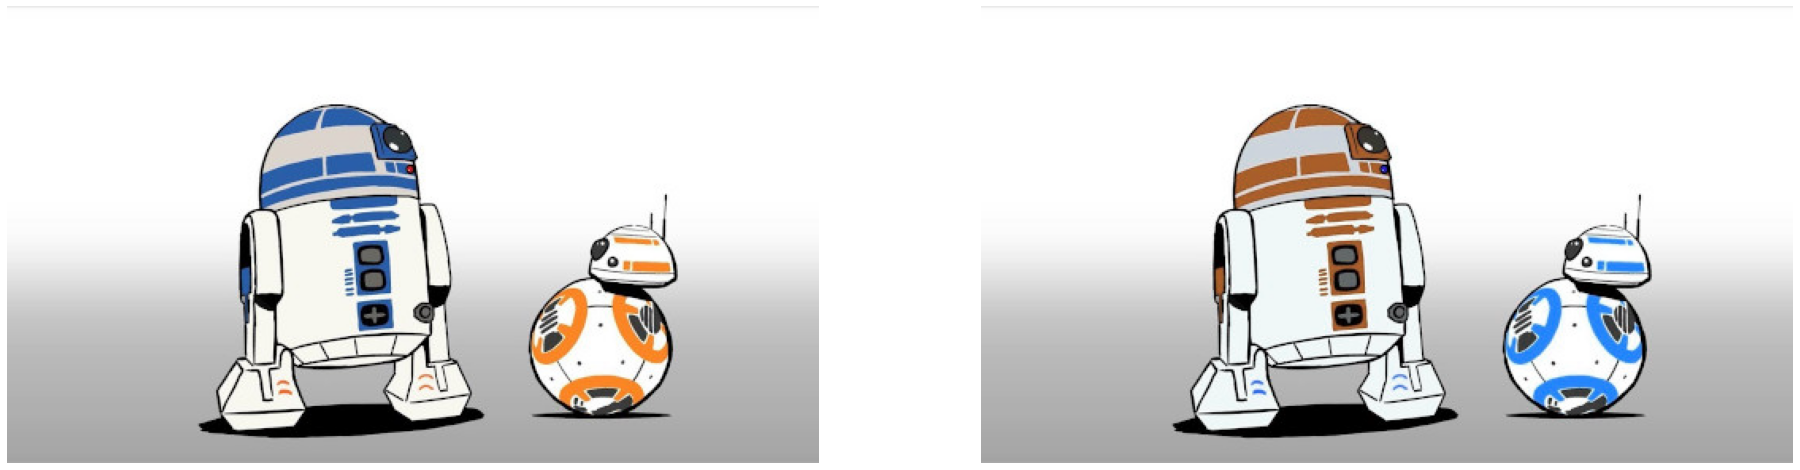

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(img_rgb)

axs[1].axis('off')
axs[1].imshow(img_bgr)

plt.show()